<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> <h1>NLP with Deep Learning for Everyone</h1>
<h1>Sequence Modeling</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import gzip
from collections import Counter
from pprint import pprint

import pandas as pd
import numpy as np
np.random.seed(42)

import matplotlib
import matplotlib.pyplot as plt 

from tqdm import tqdm
tqdm.pandas()

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import LSTM, GRU
from keras.layers import Dense
from keras.datasets import imdb
from keras.preprocessing import sequence

import watermark

%load_ext watermark
%matplotlib inline

We start by print out the versions of the libraries we're using for future reference

In [2]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 21.3.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

Git hash: c1b962e1cf0c520e16065df50d3917fdcf40eabe

tensorflow: 2.5.0
keras     : 2.4.3
matplotlib: 3.3.2
json      : 2.0.9
pandas    : 1.1.3
numpy     : 1.19.2
watermark : 2.1.0



Load default figure style

In [3]:
plt.style.use('./d4sci.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Load the IMDB dataset

In [4]:
top_words = 10000
max_words = 500

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

word_dict = imdb.get_word_index()
word_list = ["<PAD>", "<START>", "<UNK>", "<UNUSED>"]
word_list.extend([k for k, v in sorted(word_dict.items(), key = lambda x:x[1])])
word_list = np.array(word_list)

In [5]:
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

# SimpleRNN model

In [6]:
model = Sequential()
model.add(Embedding(top_words, 32))

model.add(SimpleRNN(32))

model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), # The testing data for validation
                    epochs=10, # How many epochs to train for
                    batch_size=128, # The batch size. Gradients are updated after each batch 
                    verbose=1) # The level of detail in the output

Epoch 1/10
196/196 [==============================] - 35s 106ms/step - loss: 0.6299 - accuracy: 0.6340 - val_loss: 0.5373 - val_accuracy: 0.7652
Epoch 2/10
196/196 [==============================] - 23s 117ms/step - loss: 0.3549 - accuracy: 0.8548 - val_loss: 0.3664 - val_accuracy: 0.8500
Epoch 3/10
196/196 [==============================] - 23s 117ms/step - loss: 0.2369 - accuracy: 0.9096 - val_loss: 0.4267 - val_accuracy: 0.8280
Epoch 4/10
196/196 [==============================] - 22s 111ms/step - loss: 0.1971 - accuracy: 0.9288 - val_loss: 0.3762 - val_accuracy: 0.8495
Epoch 5/10
196/196 [==============================] - 22s 115ms/step - loss: 0.1037 - accuracy: 0.9674 - val_loss: 0.4580 - val_accuracy: 0.8467
Epoch 6/10
196/196 [==============================] - 23s 116ms/step - loss: 0.0736 - accuracy: 0.9775 - val_loss: 0.4870 - val_accuracy: 0.8476
Epoch 7/10
196/196 [==============================] - 23s 115ms/step - loss: 0.0372 - accuracy: 0.9902 - val_loss: 0.5244 - val_ac

In [8]:
def plot_history(history):    
    fig, ax_lst = plt.subplots(1, 2, sharex=True, sharey=True)

    epochs = np.array(history.epoch) + 1
    
    ax_lst[0].plot(epochs, history.history['loss'], label='Training')
    ax_lst[0].plot(epochs, history.history['val_loss'], label='Testing')
    ax_lst[0].set_ylabel('Loss')
    ax_lst[0].set_xlabel('Epoch')
    ax_lst[0].set_xticks(epochs)
    
    best_epoch = np.argmin(history.history['val_loss']) + 1
    ax_lst[0].axvline(x=best_epoch, linestyle=':', color=colors[2])
    ax_lst[0].legend()
    

    ax_lst[1].plot(epochs, history.history['accuracy'], label='Training')
    ax_lst[1].plot(epochs, history.history['val_accuracy'], label='Testing')
    ax_lst[1].set_ylabel('Accuracy')
    ax_lst[1].set_xlabel('Epoch')
    ax_lst[1].set_xticks(epochs)
    ax_lst[1].axvline(x=best_epoch, linestyle=':', color=colors[2])


    fig.tight_layout()

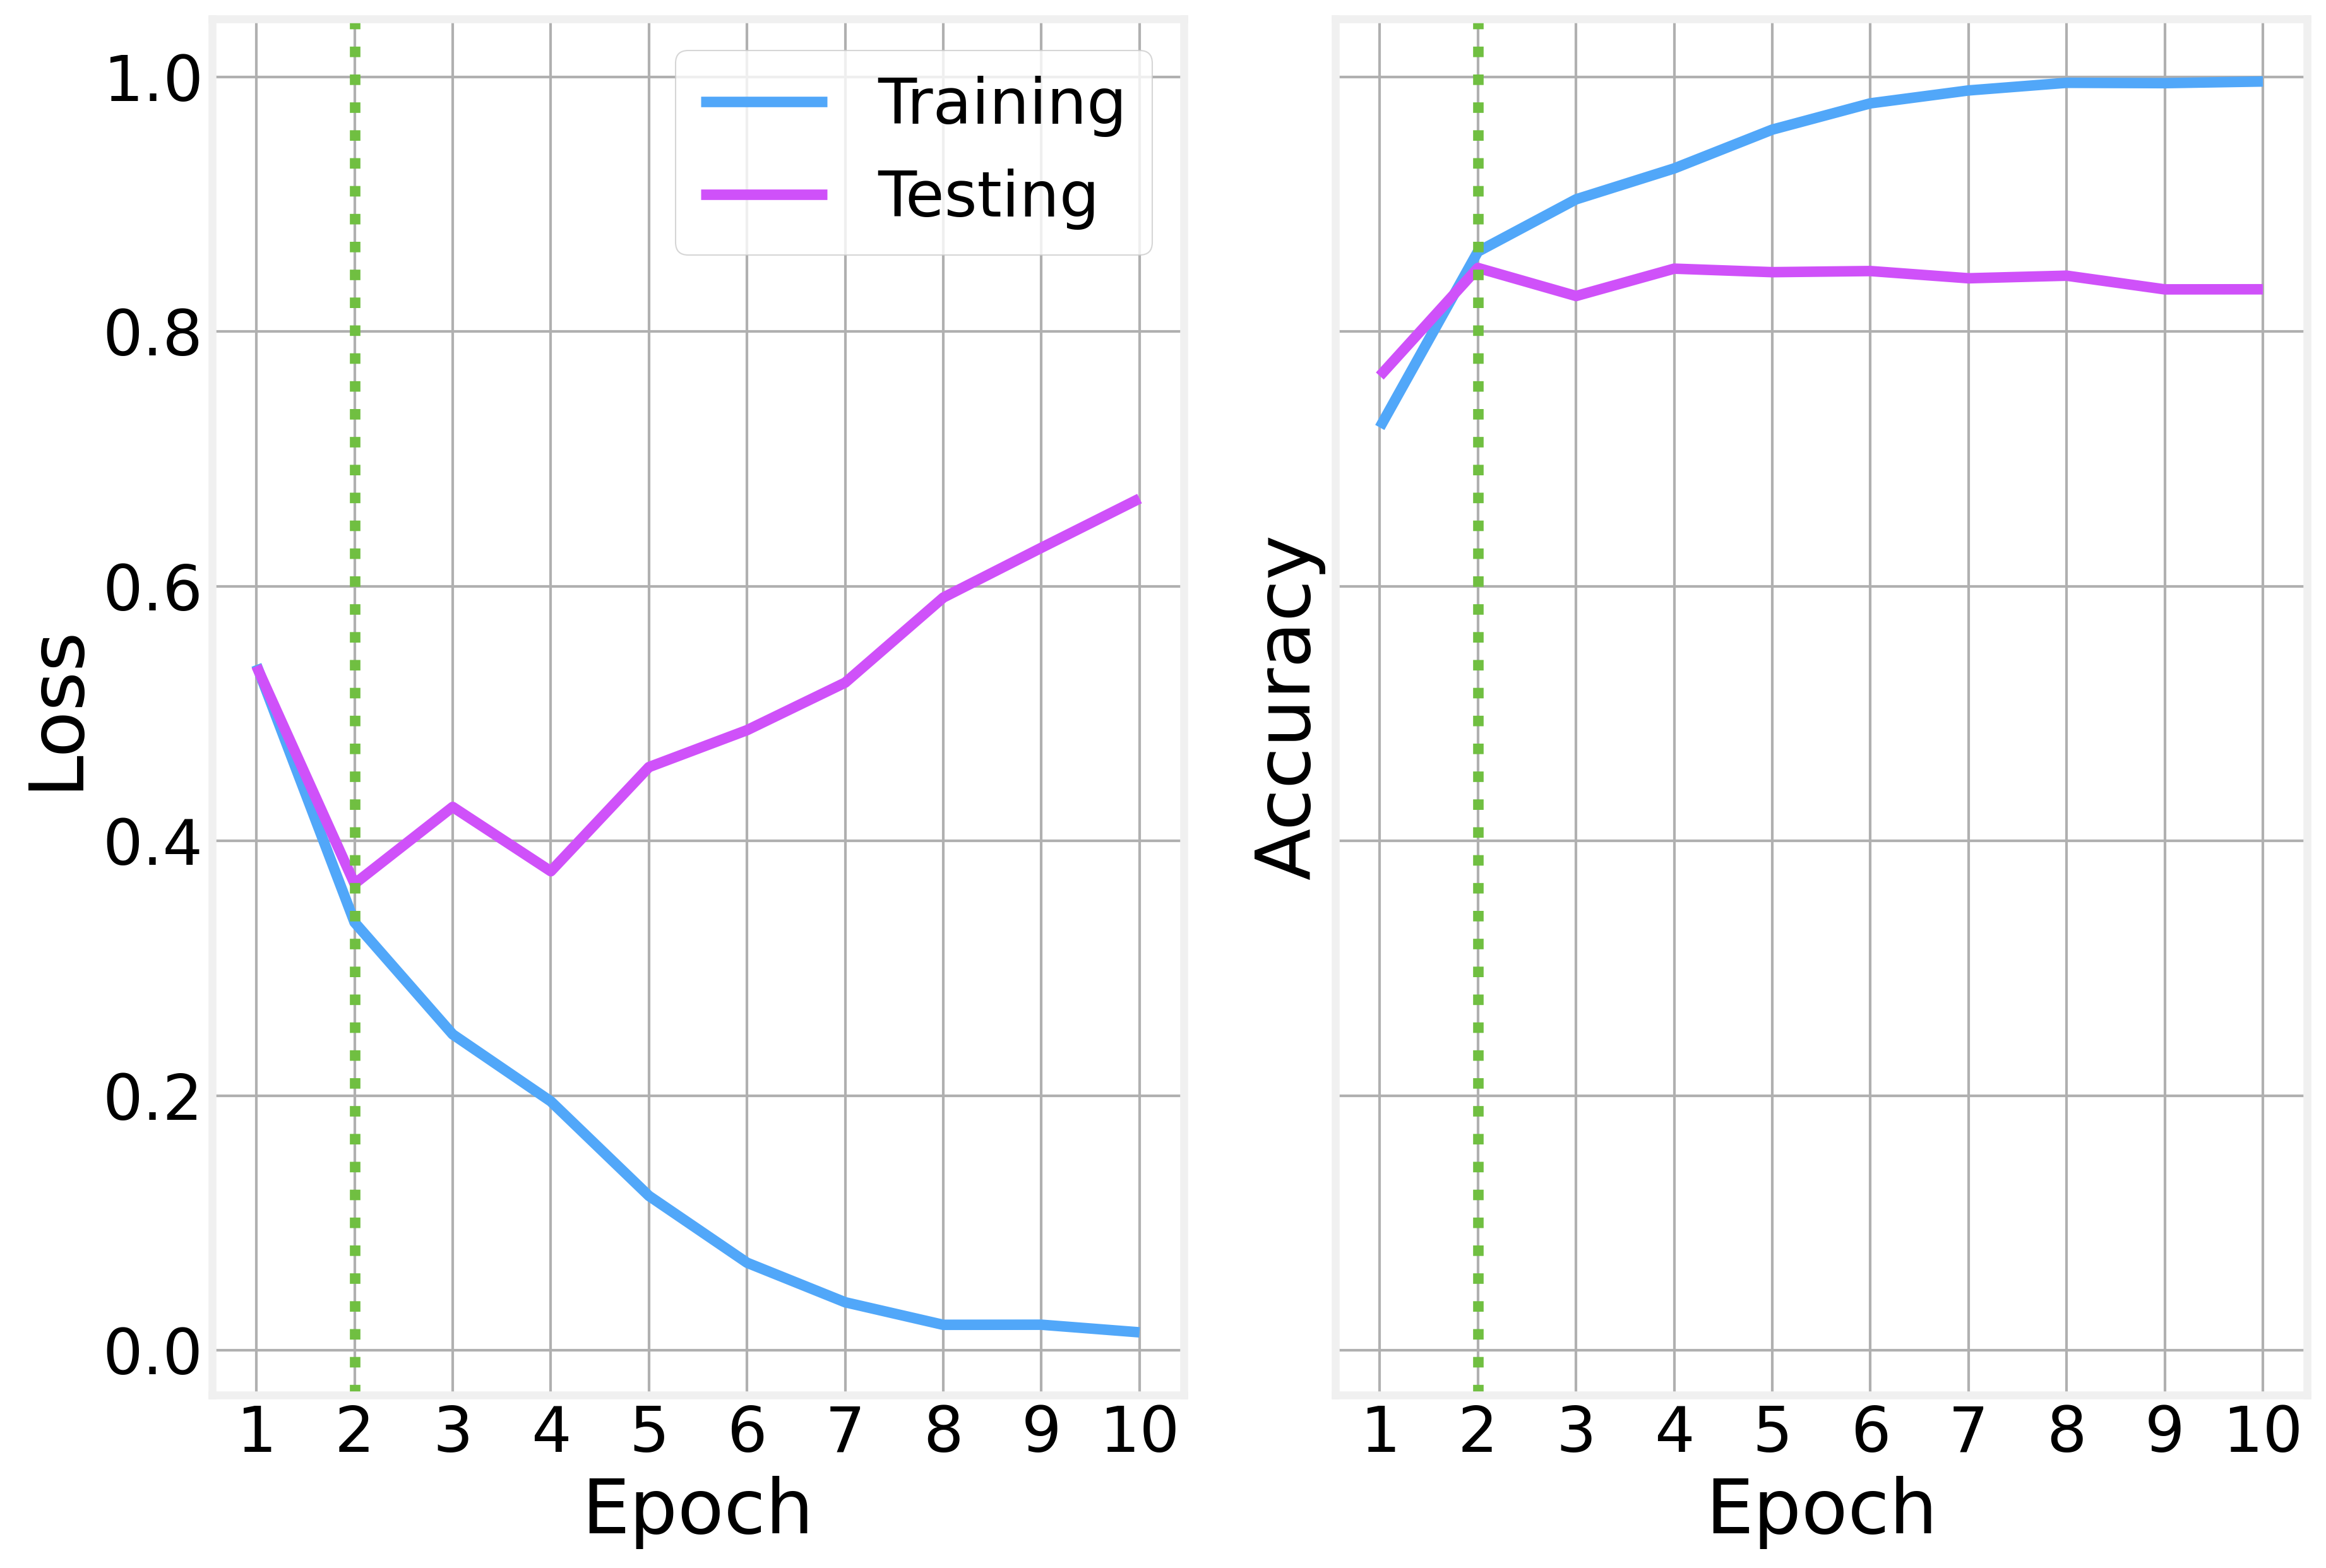

In [9]:
plot_history(history)

# GRU

In [10]:
model = Sequential()
model.add(Embedding(top_words, 32))

model.add(GRU(32))

model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
gru (GRU)                    (None, 32)                6336      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 326,369
Trainable params: 326,369
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), # The testing data for validation
                    epochs=10, # How many epochs to train for
                    batch_size=128, # The batch size. Gradients are updated after each batch 
                    verbose=1) # The level of detail in the output

Epoch 1/10
196/196 [==============================] - 42s 200ms/step - loss: 0.6066 - accuracy: 0.6299 - val_loss: 0.3463 - val_accuracy: 0.8522
Epoch 2/10
196/196 [==============================] - 38s 195ms/step - loss: 0.2603 - accuracy: 0.8981 - val_loss: 0.3088 - val_accuracy: 0.8729
Epoch 3/10
196/196 [==============================] - 39s 200ms/step - loss: 0.1817 - accuracy: 0.9326 - val_loss: 0.3238 - val_accuracy: 0.8702
Epoch 4/10
196/196 [==============================] - 39s 199ms/step - loss: 0.1462 - accuracy: 0.9510 - val_loss: 0.3831 - val_accuracy: 0.8576
Epoch 5/10
196/196 [==============================] - 39s 199ms/step - loss: 0.1219 - accuracy: 0.9599 - val_loss: 0.3858 - val_accuracy: 0.8573
Epoch 6/10
196/196 [==============================] - 39s 200ms/step - loss: 0.1063 - accuracy: 0.9674 - val_loss: 0.3988 - val_accuracy: 0.8601
Epoch 7/10
196/196 [==============================] - 39s 199ms/step - loss: 0.0957 - accuracy: 0.9702 - val_loss: 0.4408 - val_ac

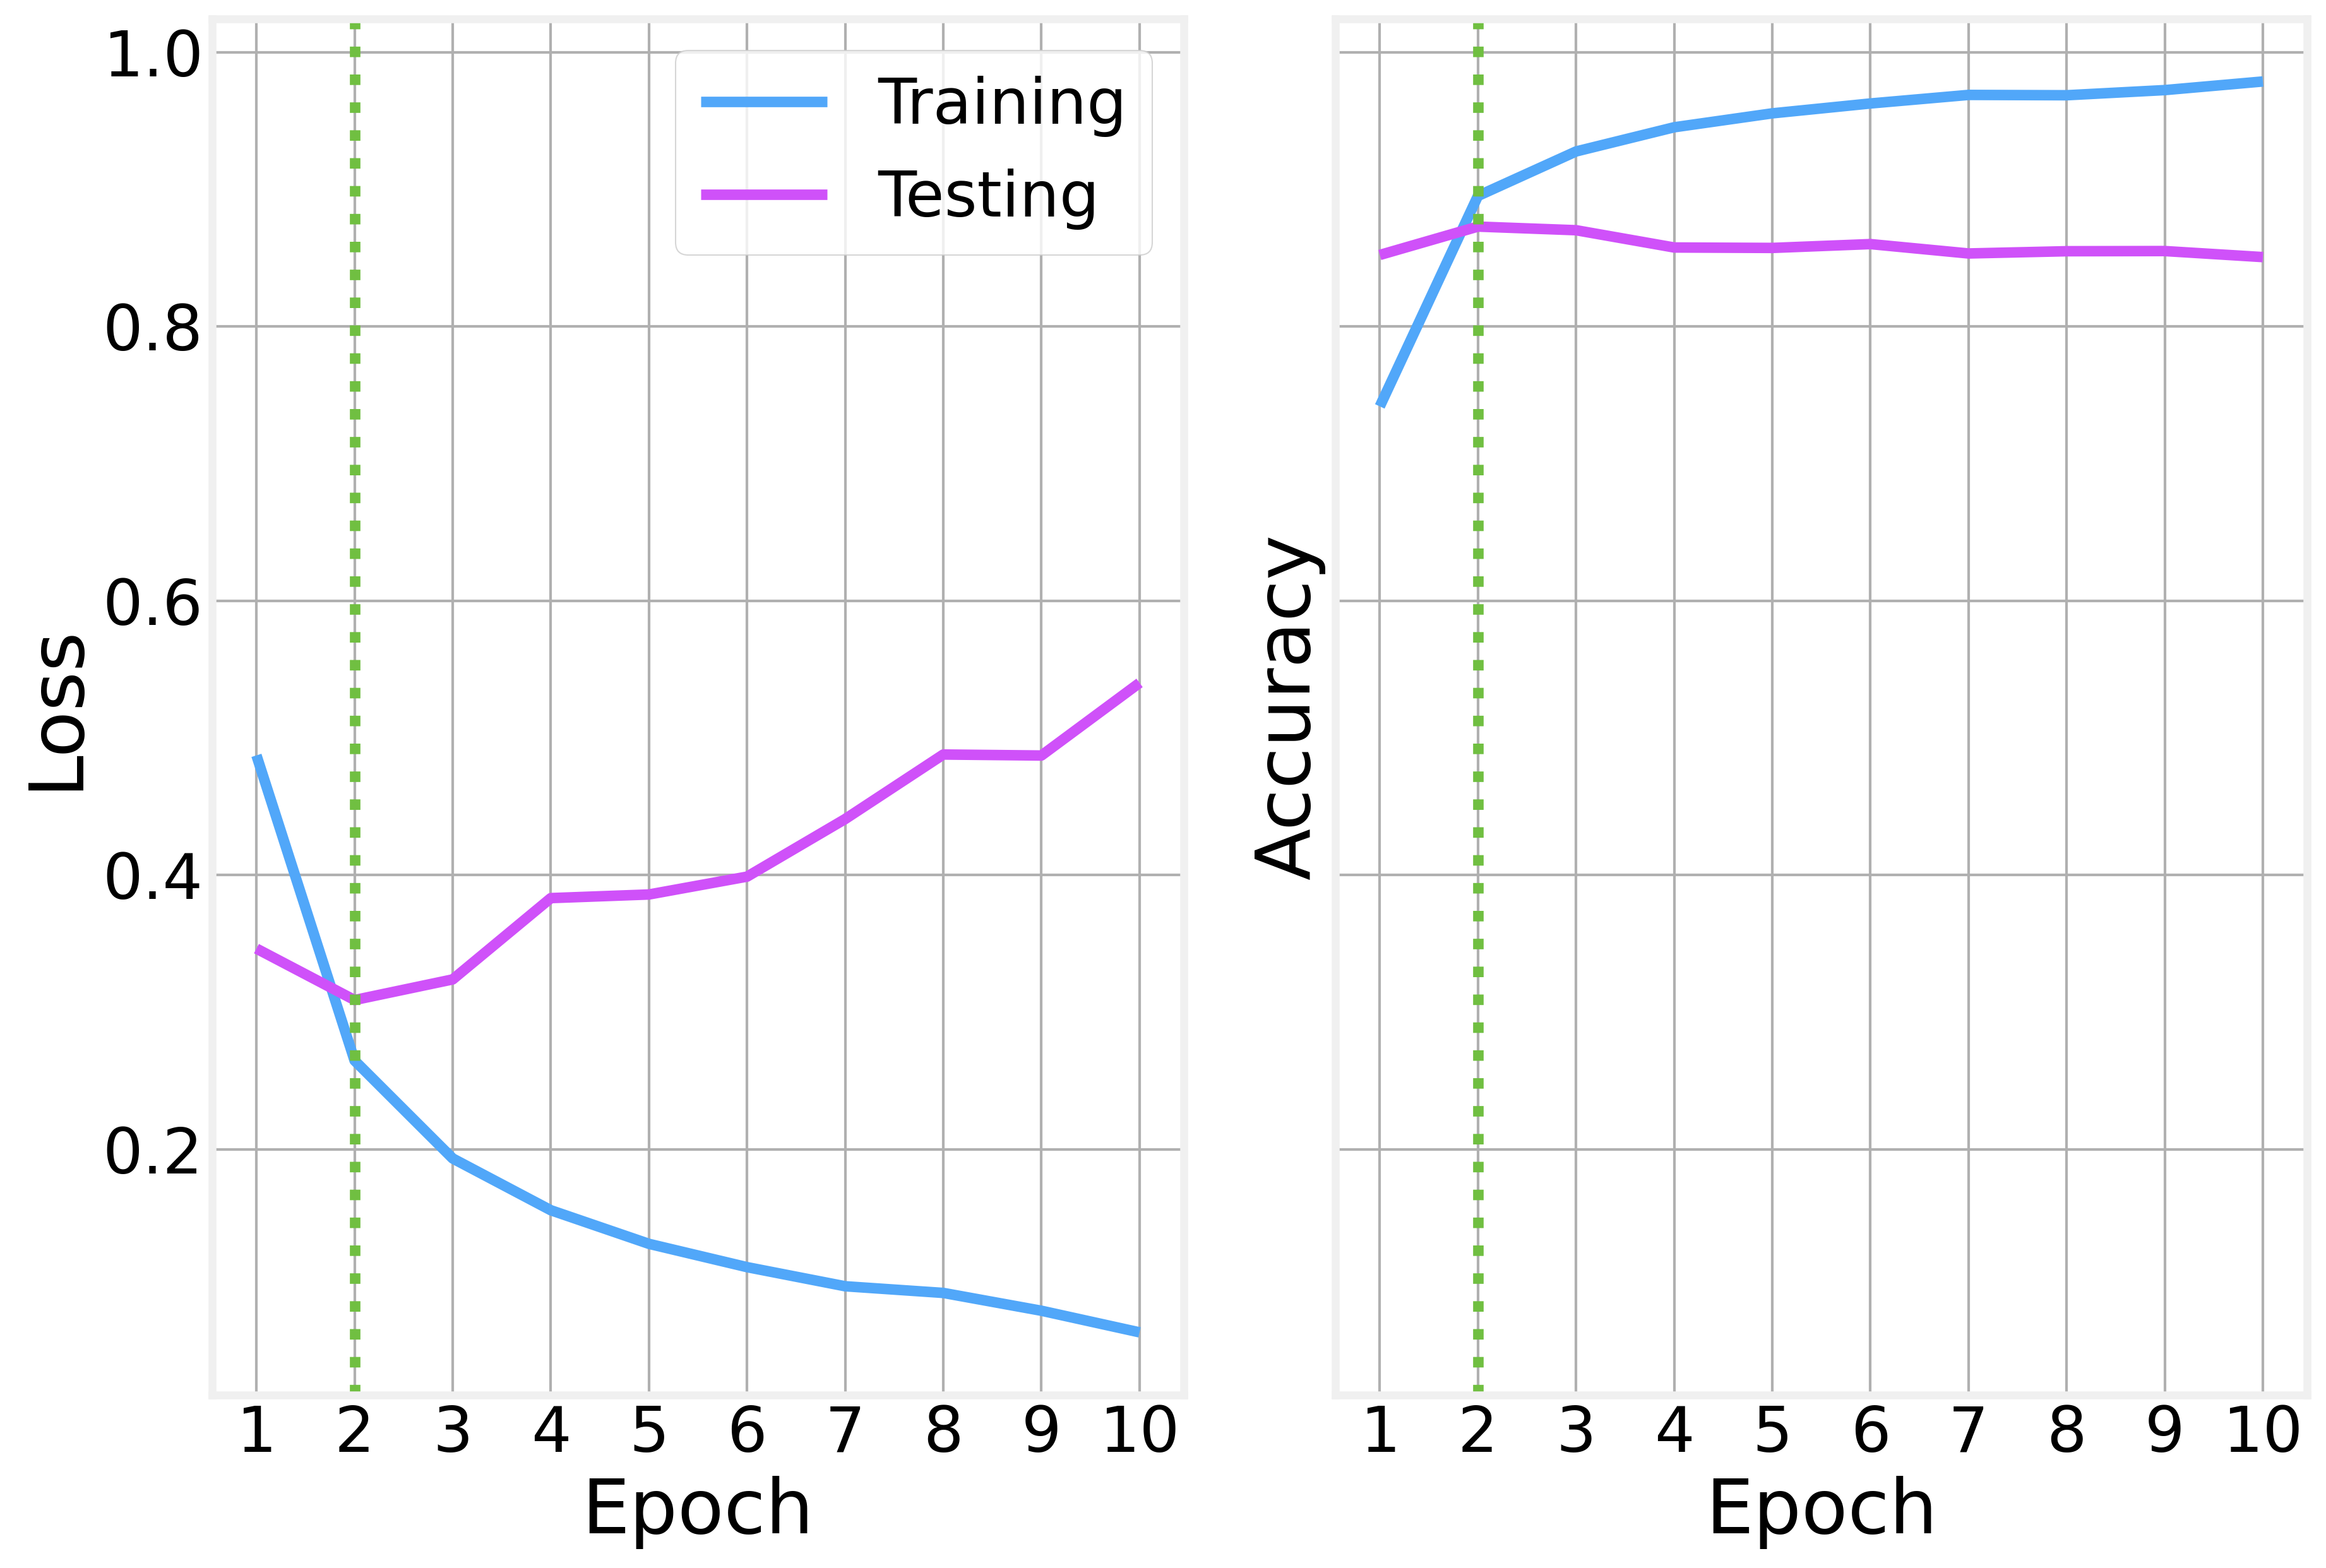

In [12]:
plot_history(history)

# LSTM

In [13]:
model = Sequential()
model.add(Embedding(top_words, 32))

model.add(LSTM(32))

model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), # The testing data for validation
                    epochs=10, # How many epochs to train for
                    batch_size=128, # The batch size. Gradients are updated after each batch 
                    verbose=1) # The level of detail in the output

Epoch 1/10
196/196 [==============================] - 43s 207ms/step - loss: 0.5866 - accuracy: 0.6684 - val_loss: 0.3016 - val_accuracy: 0.8764
Epoch 2/10
196/196 [==============================] - 40s 204ms/step - loss: 0.2470 - accuracy: 0.9079 - val_loss: 0.2902 - val_accuracy: 0.8822
Epoch 3/10
196/196 [==============================] - 43s 218ms/step - loss: 0.1754 - accuracy: 0.9375 - val_loss: 0.3101 - val_accuracy: 0.8760
Epoch 4/10
196/196 [==============================] - 43s 219ms/step - loss: 0.1403 - accuracy: 0.9530 - val_loss: 0.4608 - val_accuracy: 0.8589
Epoch 5/10
196/196 [==============================] - 45s 230ms/step - loss: 0.1413 - accuracy: 0.9509 - val_loss: 0.3927 - val_accuracy: 0.8572
Epoch 6/10
196/196 [==============================] - 45s 231ms/step - loss: 0.1080 - accuracy: 0.9658 - val_loss: 0.4341 - val_accuracy: 0.8671
Epoch 7/10
196/196 [==============================] - 41s 209ms/step - loss: 0.0784 - accuracy: 0.9768 - val_loss: 0.4486 - val_ac

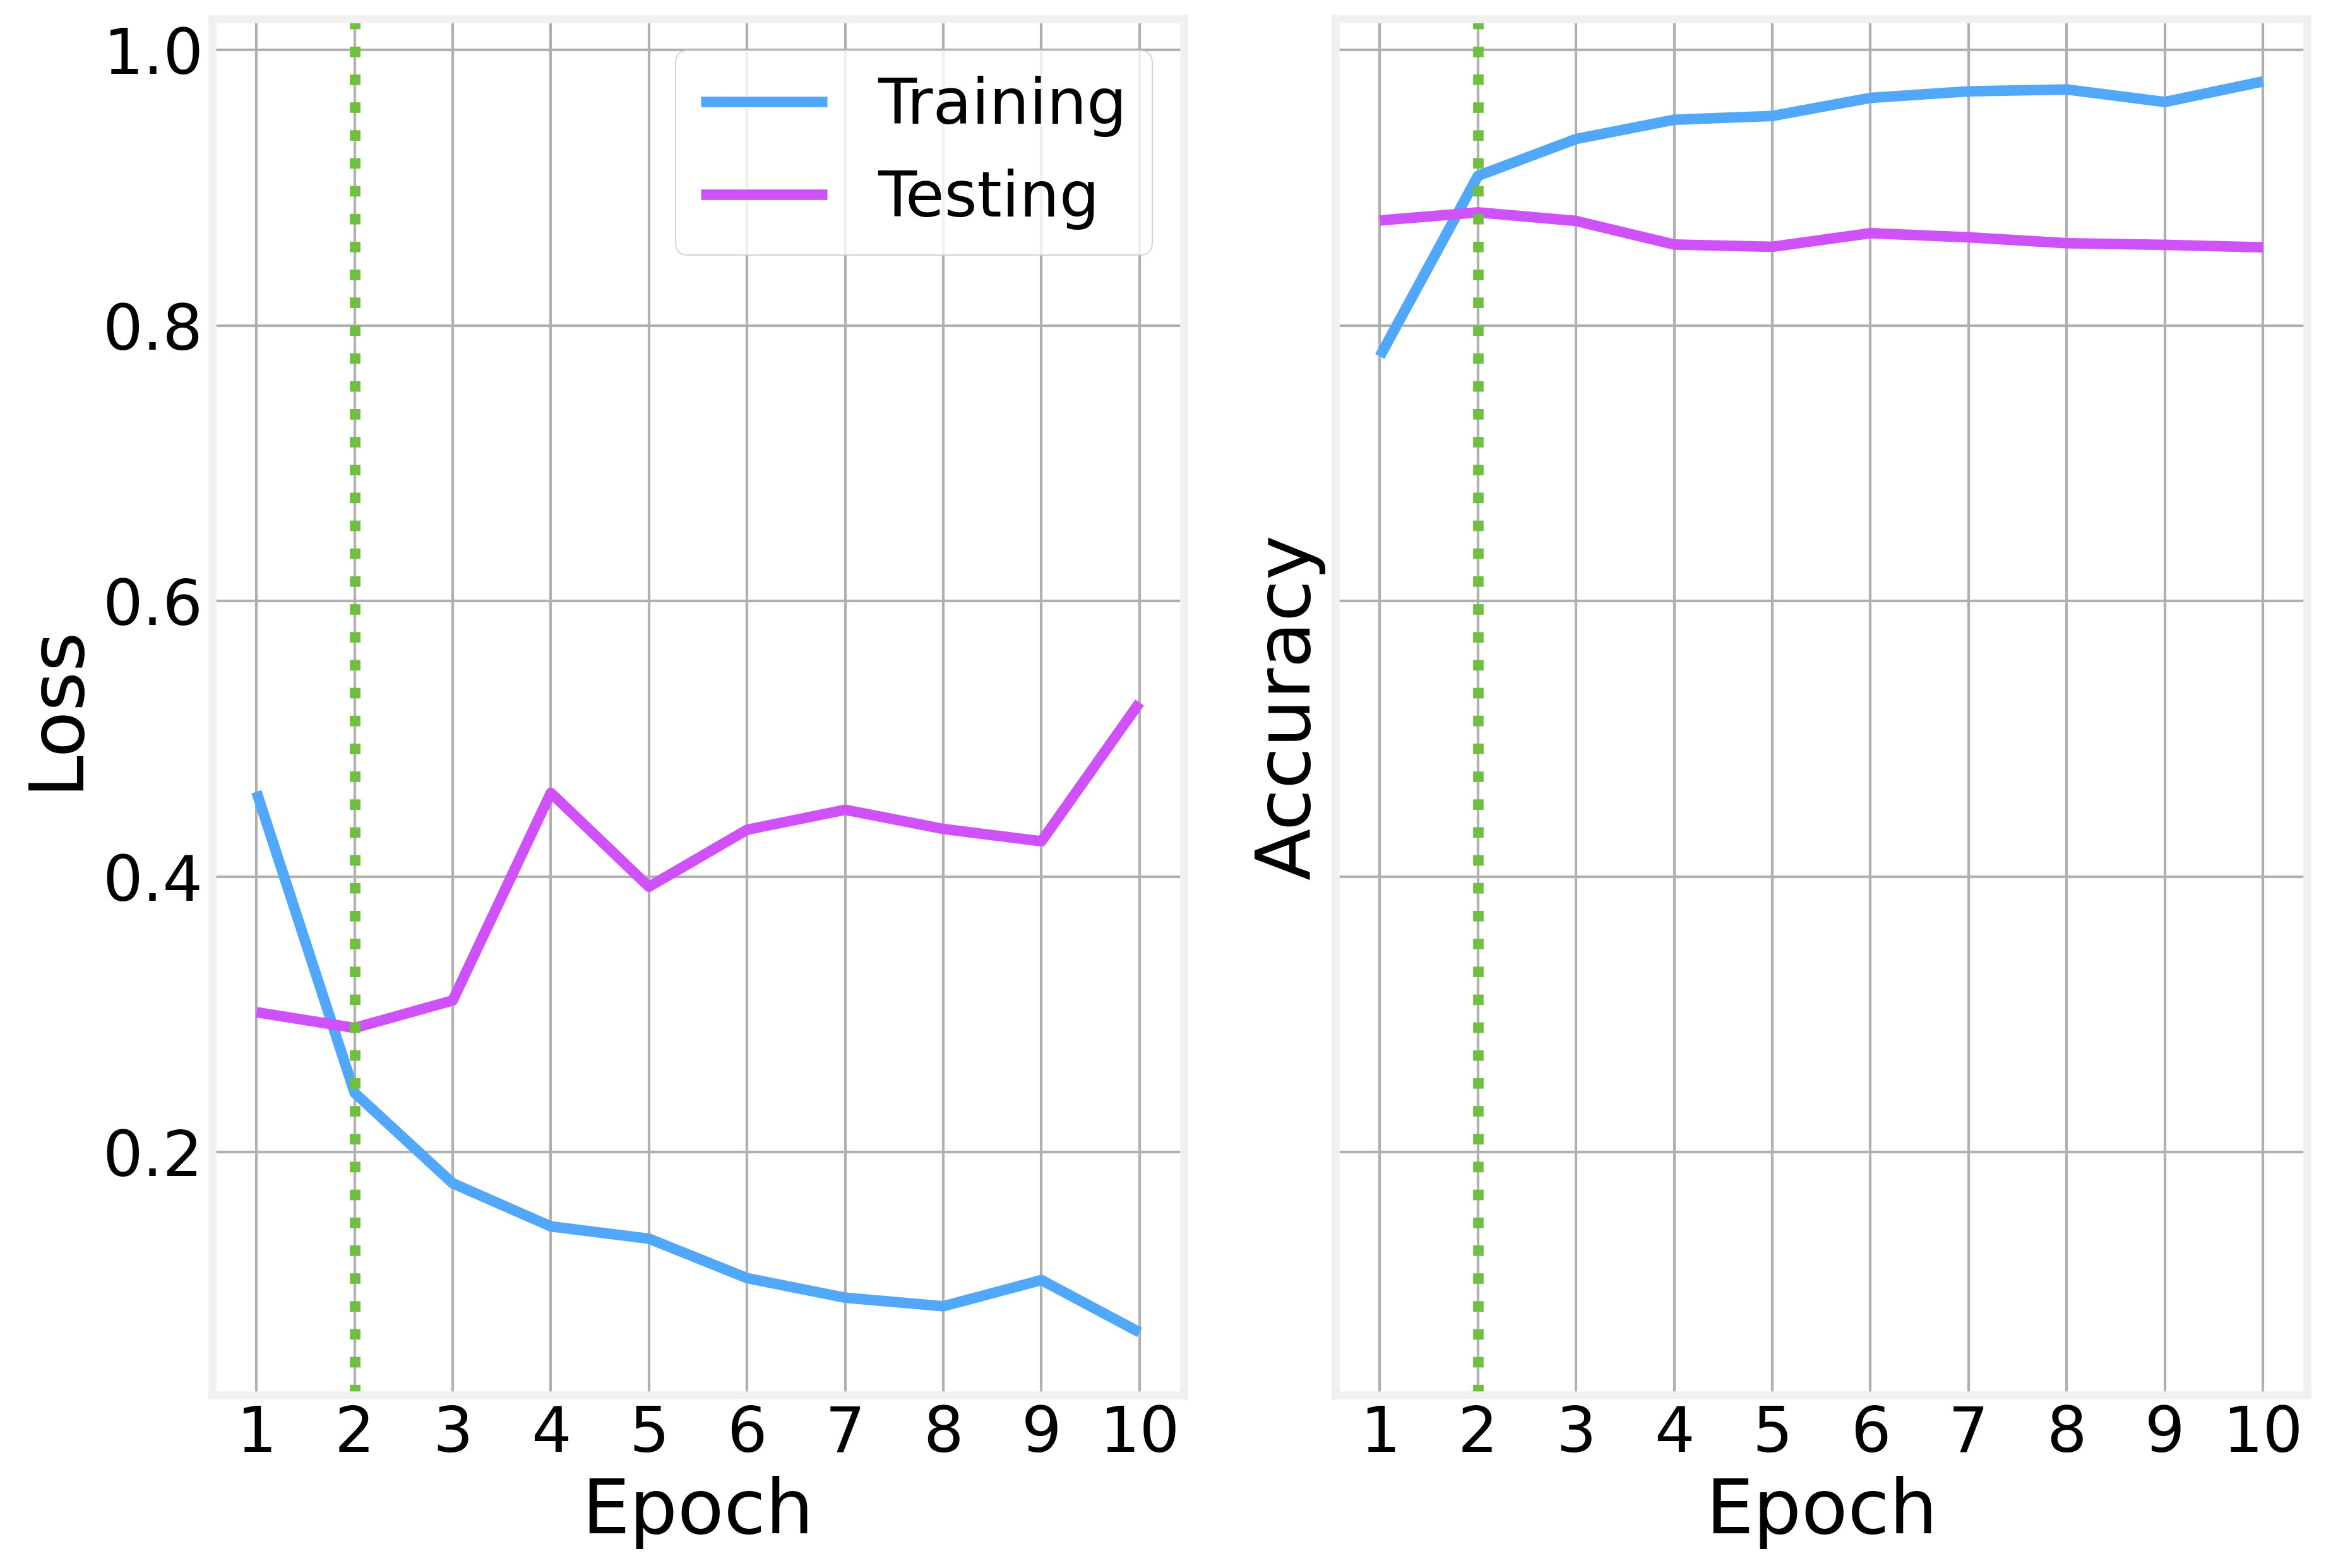

In [15]:
plot_history(history)

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>